# Machine Learning Model to predict closing price of Netflix Stock

## a. Loading and description of the dataset

### Loading data into a dataframe and sorting the rows on the basis of Date.
  The data is already sorted by date in the csv file as well. But we still do the operation just to be sure.

In [366]:
import pandas as pd
df = pd.read_csv('NFLX.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')


### Adding Some Additional Variables

In [367]:
df['Amplitude'] = df['High'] - df['Low']
df['Day_of_Week'] = df['Date'].dt.dayofweek
df['Previous_Close'] = df['Close'].shift(1)
df.loc[0, 'Previous_Close'] = df.loc[0, 'Open']
print(df.head(5))

        Date        Open        High         Low       Close   Adj Close  \
0 2023-02-01  353.859985  365.390015  349.910004  361.989990  361.989990   
1 2023-02-02  365.160004  368.320007  358.429993  366.890015  366.890015   
2 2023-02-03  359.079987  379.429993  359.000000  365.899994  365.899994   
3 2023-02-06  363.640015  368.450012  360.679993  361.480011  361.480011   
4 2023-02-07  358.510010  364.179993  354.179993  362.950012  362.950012   

    Volume  Amplitude  Day_of_Week  Previous_Close  
0  8005200  15.480011            2      353.859985  
1  7857000   9.890014            3      361.989990  
2  9402000  20.429993            4      366.890015  
3  4994900   7.770019            0      365.899994  
4  6289400  10.000000            1      361.480011  


In [368]:
print("This DataFrame has {} rows and {} columns.".format(df.shape[0], df.shape[1]))
print("\nColumn Names in the DataFrame:")
print(df.columns)
print("\nTop 5 rows of the DataFrame:")
print(df.head(5))
print("\nBottom 5 rows of the DataFrame:")
print(df.tail(5))
print("\nDataFrame Information:")
print(df.info())

This DataFrame has 251 rows and 10 columns.

Column Names in the DataFrame:
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Amplitude', 'Day_of_Week', 'Previous_Close'],
      dtype='object')

Top 5 rows of the DataFrame:
        Date        Open        High         Low       Close   Adj Close  \
0 2023-02-01  353.859985  365.390015  349.910004  361.989990  361.989990   
1 2023-02-02  365.160004  368.320007  358.429993  366.890015  366.890015   
2 2023-02-03  359.079987  379.429993  359.000000  365.899994  365.899994   
3 2023-02-06  363.640015  368.450012  360.679993  361.480011  361.480011   
4 2023-02-07  358.510010  364.179993  354.179993  362.950012  362.950012   

    Volume  Amplitude  Day_of_Week  Previous_Close  
0  8005200  15.480011            2      353.859985  
1  7857000   9.890014            3      361.989990  
2  9402000  20.429993            4      366.890015  
3  4994900   7.770019            0      365.899994  
4  6289400  10.000000     

## b. Minimal exploratory analysis and graphs

In [369]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume,Amplitude,Day_of_Week,Previous_Close
count,251,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000,251.000000,251.000000
mean,2023-08-01 05:44:13.386454272,404.181354,409.754742,398.958446,404.270478,404.270478,6.135308e+06,10.796295,2.047809,403.432828
min,2023-02-01 00:00:00,287.339996,297.450012,285.329987,292.760010,292.760010,1.404700e+06,3.260009,0.000000,292.760010
25%,2023-05-02 12:00:00,348.994995,356.860001,344.490005,348.119995,348.119995,3.966000e+06,7.729996,1.000000,348.119995
50%,2023-08-02 00:00:00,412.000000,418.839996,407.399994,411.690002,411.690002,5.128900e+06,9.890014,2.000000,411.250000
75%,2023-10-30 12:00:00,444.729996,448.574997,439.175003,444.944992,444.944992,6.880600e+06,13.024994,3.000000,444.334992
max,2024-01-31 00:00:00,571.349976,579.640015,562.679993,575.789978,575.789978,2.807440e+07,29.500000,4.000000,575.789978
std,NaN,60.849872,61.318707,60.722608,61.193722,61.193722,3.814621e+06,4.535694,1.393451,60.431261


### Daily Open, Close, High and Low Graph

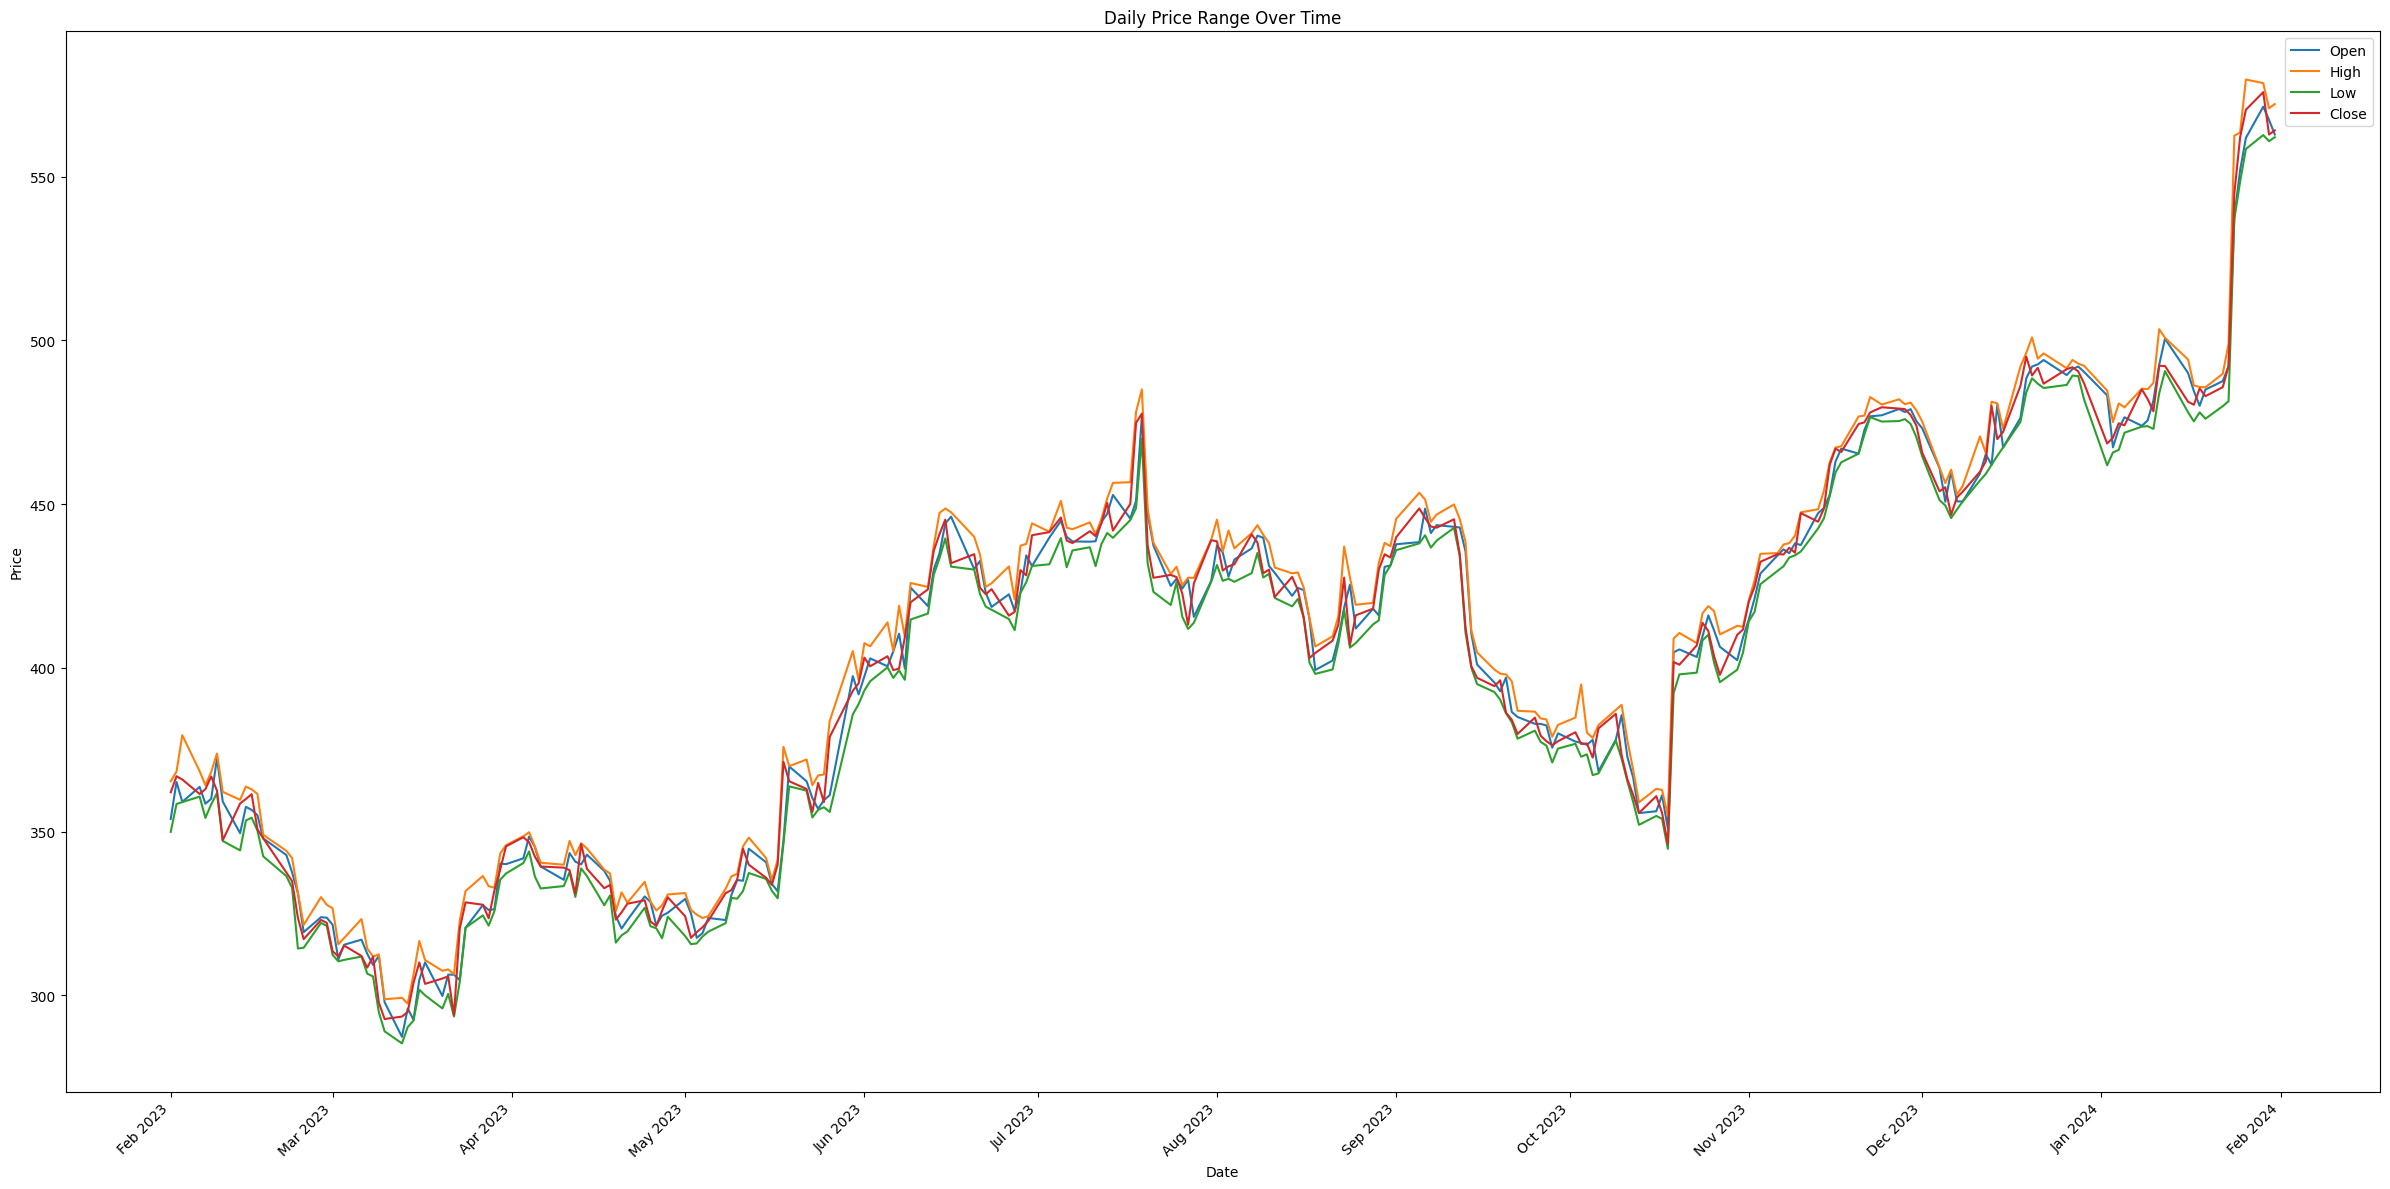

In [370]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(24,12))
plt.plot(df['Date'], df['Open'], label='Open')
plt.plot(df['Date'], df['High'], label='High')
plt.plot(df['Date'], df['Low'], label='Low')
plt.plot(df['Date'], df['Close'], label='Close')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45, ha='right')
plt.title("Daily Price Range Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.show()



### Daily Volume Traded Over Time Graph

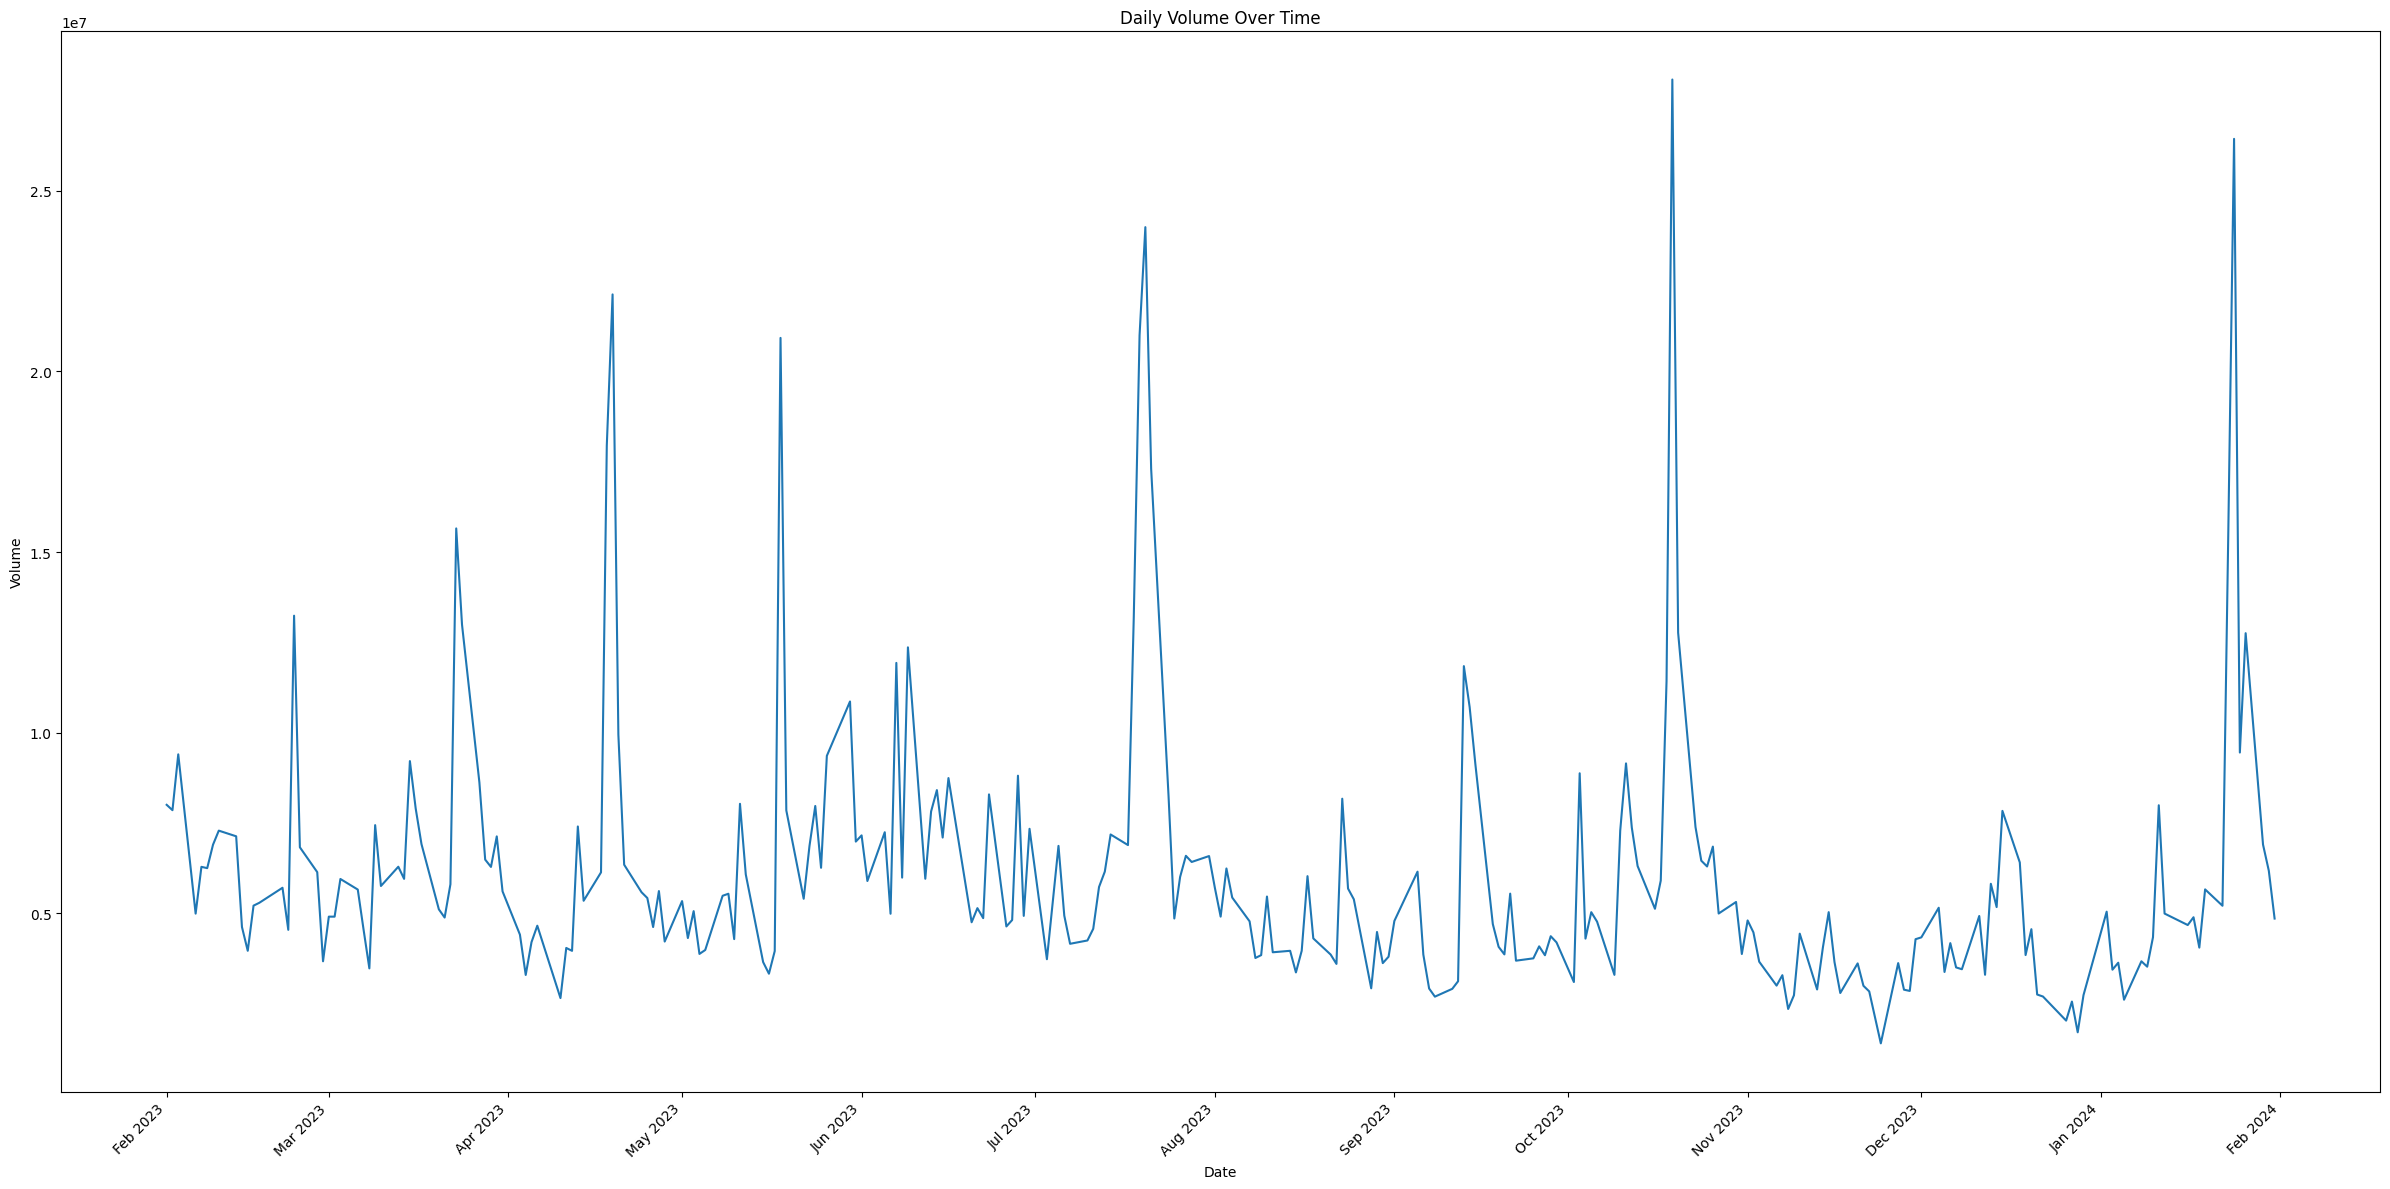

In [371]:
plt.figure(figsize=(24,12))
plt.plot(df['Date'], df['Volume'], label='Volume', color='C0')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45, ha='right')
plt.title("Daily Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.tight_layout()
plt.show()

## c. Data Preparation

### Adequate treatment of the Date spine
  * Date was converted to "datetime64[ns]" data type using Pandas Package when the DF was imported from CSV.
  * The rows of the dataframe were already sorted when they were imported from the csv file but we still sorted it just to be sure.

### Treatment of missing amounts or inconsistencies, if any
 * There are no inconsistencies in the dataset, some days are missing but the days that are missing are public holidays when the market was  probably closed.
 * The consistency of dataset is also tested below.

Checking DF for any Null, Duplicate or Invalid Values

In [372]:
print("There are no Null values in any column:")
print(df.isnull().sum())
print()
print(f"Number of duplicate lines in df: {df.duplicated(keep=False).sum().item()}")


There are no Null values in any column:
Date              0
Open              0
High              0
Low               0
Close             0
Adj Close         0
Volume            0
Amplitude         0
Day_of_Week       0
Previous_Close    0
dtype: int64

Number of duplicate lines in df: 0


Also few other checkings in the DF, that we can see from graphs above are: 
 * There are no negative values for Open, Close, High and Low.
 * High is never less than low for the day

### Creation of input variables and definition of the target variable (Close)

In [373]:
input_variables = ["Open", "High", "Low", "Volume", "Amplitude", "Day_of_Week", "Previous_Close"]
target_variable = "Close"

## d. Training and Sequential Test division, without randomly shuffling the lines

In [374]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
split_index = int(0.8 * len(df))
train_df = df.iloc[:split_index]
test_df = df.iloc[split_index:]
print(f"Training set has {train_df.shape[0]} rows and {train_df.shape[1]} columns.")
print(train_df.head(10))
print(train_df.tail(10))
print(f"Testing set has {test_df.shape[0]} rows and {test_df.shape[1]} columns.")
print(test_df.head(10))
print(test_df.tail(10))
train_df_scaled_X = scaler.fit_transform(train_df[input_variables])
test_df_scaled_X = scaler.transform(test_df[input_variables])
train_df_Y = train_df[target_variable]
test_df_Y = test_df[target_variable]

Training set has 200 rows and 10 columns.
        Date        Open        High         Low       Close   Adj Close  \
0 2023-02-01  353.859985  365.390015  349.910004  361.989990  361.989990   
1 2023-02-02  365.160004  368.320007  358.429993  366.890015  366.890015   
2 2023-02-03  359.079987  379.429993  359.000000  365.899994  365.899994   
3 2023-02-06  363.640015  368.450012  360.679993  361.480011  361.480011   
4 2023-02-07  358.510010  364.179993  354.179993  362.950012  362.950012   
5 2023-02-08  360.019989  368.190002  358.309998  366.829987  366.829987   
6 2023-02-09  372.410004  373.829987  361.739990  362.500000  362.500000   
7 2023-02-10  359.160004  362.140015  347.140015  347.359985  347.359985   
8 2023-02-13  349.500000  359.700012  344.250000  358.570007  358.570007   
9 2023-02-14  357.549988  363.750000  353.399994  359.959991  359.959991   

    Volume  Amplitude  Day_of_Week  Previous_Close  
0  8005200  15.480011            2      353.859985  
1  7857000   9.

## e. Implementation, Training and Evaluation of the two required models: Linear Regression and KNN

### Linear Regression Model Training

In [375]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(train_df_scaled_X, train_df_Y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Linear Regression Model Predections

In [376]:
linear_model_predictions = linear_model.predict(test_df_scaled_X)
print("Linear Model Predictions:")
print(linear_model_predictions)

Linear Model Predictions:
[463.94950858 464.86478869 473.71385493 475.40174715 481.72076781
 478.60221367 478.85428935 479.00784629 477.35681897 474.15586136
 467.68305164 453.17222805 454.49751379 448.05535661 451.38129368
 455.20609956 465.83336157 461.33811535 475.12451567 467.05555097
 472.84135493 486.45877213 490.44855502 495.37895025 489.60971026
 488.42765863 489.28613598 492.54624982 491.18015447 484.74815905
 464.6417436  471.96197774 472.90847397 475.30729449 481.98843275
 480.81481887 477.97466057 492.92905295 493.06728251 482.33399613
 478.34543949 483.19116152 478.55336451 483.37002097 488.96631326
 557.51609242 557.9755191  571.80868519 569.23096    564.88572342
 569.48541998]


### Linear Regression Model Scores

In [377]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.metrics import r2_score as r2

linear_model_mse = mse(test_df_Y, linear_model_predictions)
linear_model_rmse = rmse(test_df_Y, linear_model_predictions)
linear_model_r2 = r2(test_df_Y, linear_model_predictions)
print(f"Linear Regression Model Performance on Test Set:")
print(f"Mean Squared Error (MSE): {linear_model_mse}")
print(f"Root Mean Squared Error (RMSE): {linear_model_rmse}")
print(f"R-squared (R2 ): {linear_model_r2}")

Linear Regression Model Performance on Test Set:
Mean Squared Error (MSE): 10.05331218923806
Root Mean Squared Error (RMSE): 3.1706958525279685
R-squared (R2 ): 0.9890801955657597


### Graph comparing Linear regression model Predicted closing price and Actual closing price

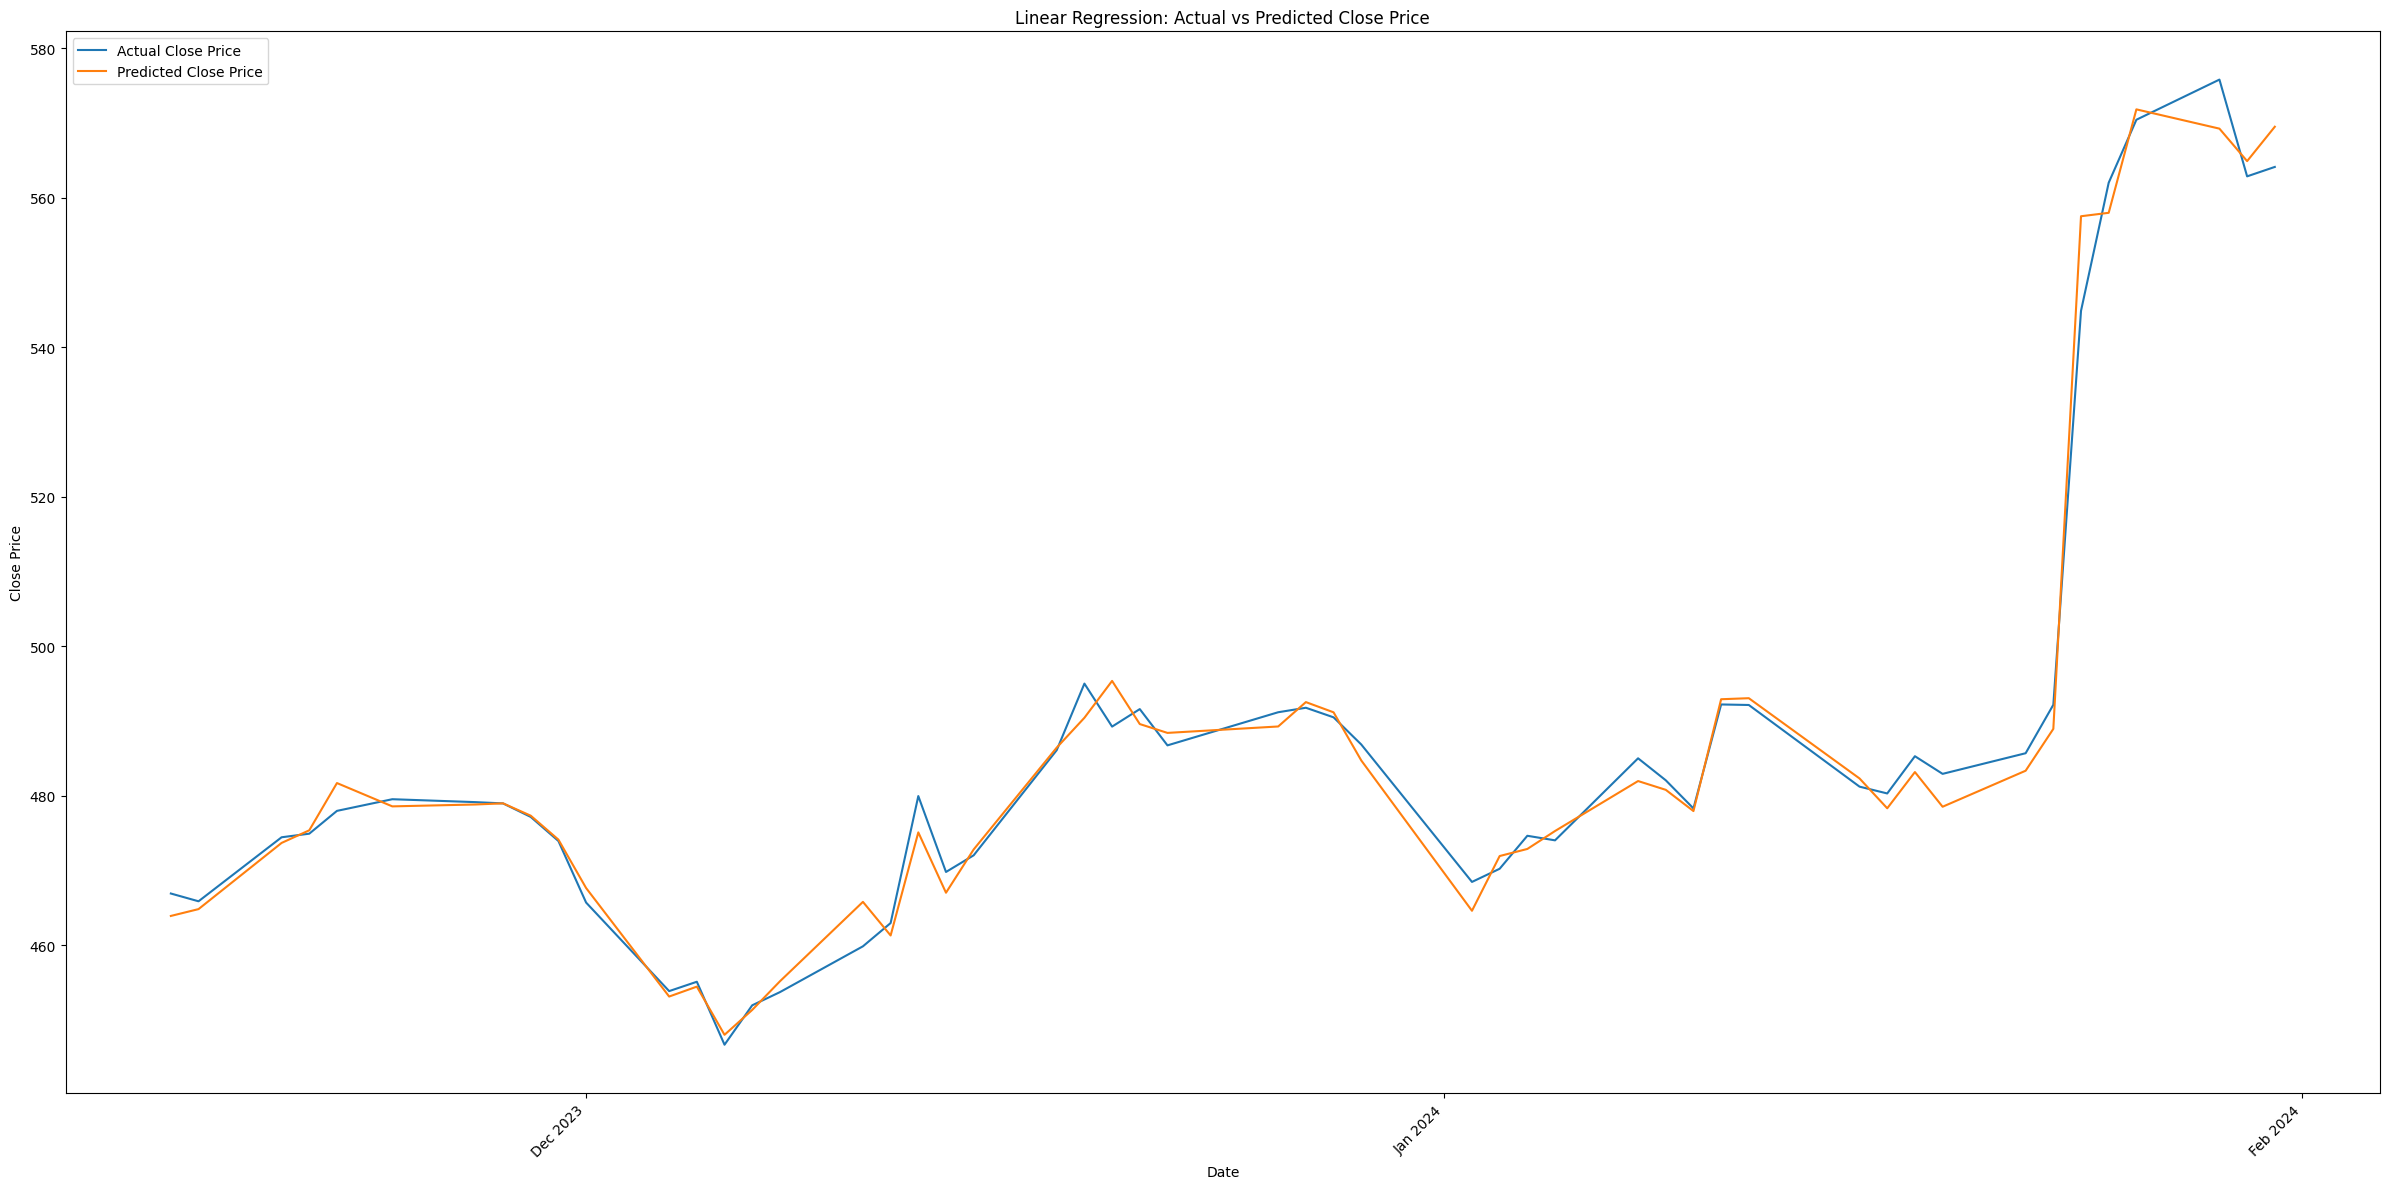

In [378]:
plt.figure(figsize=(24,12))
plt.plot(test_df['Date'], test_df_Y, label='Actual Close Price', color='C0')
plt.plot(test_df['Date'], linear_model_predictions, label='Predicted Close Price', color='C1')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45, ha='right')
plt.title("Linear Regression: Actual vs Predicted Close Price")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.tight_layout()
plt.show()

### Calculation for the right value of K for KNN (K-Nearest Neighbors) Regression Model

In [379]:
from sklearn.neighbors import KNeighborsRegressor
k_values = range(1, 51)
knn_mse_results = {}
knn_rmse_results = {}
knn_r2_results = {}
for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(train_df_scaled_X, train_df_Y)
    knn_predictions = knn_model.predict(test_df_scaled_X)
    knn_mse_results[k] = mse(test_df_Y, knn_predictions)
    knn_rmse_results[k] = rmse(test_df_Y, knn_predictions)
    knn_r2_results[k] = r2(test_df_Y, knn_predictions)
    print(f"KNN (k={k}) - MSE: {knn_mse_results[k]}, RMSE: {knn_rmse_results[k]}, R2: {knn_r2_results[k]}")

best_k_mse = min(knn_mse_results, key=knn_mse_results.get)
best_k_rmse = min(knn_rmse_results, key=knn_rmse_results.get)
best_k_r2 = max(knn_r2_results, key=knn_r2_results.get)
print(f"Best k for MSE: {best_k_mse} with MSE: {knn_mse_results[best_k_mse]}")
print(f"Best k for RMSE: {best_k_rmse} with RMSE: {knn_rmse_results[best_k_rmse]}")
print(f"Best k for R2: {best_k_r2} with R2: {knn_r2_results[best_k_r2]}")

KNN (k=1) - MSE: 1583.2693448366063, RMSE: 39.790317224628986, R2: -0.7197308993200568
KNN (k=2) - MSE: 1898.0477018986624, RMSE: 43.566589284664715, R2: -1.0616399174174709
KNN (k=3) - MSE: 2111.5538168443004, RMSE: 45.9516465085235, R2: -1.2935480663772339
KNN (k=4) - MSE: 2272.8529326803596, RMSE: 47.67444737676945, R2: -1.468749509164533
KNN (k=5) - MSE: 2316.3726597553955, RMSE: 48.12870930905373, R2: -1.5160201896870809
KNN (k=6) - MSE: 2387.8013094336397, RMSE: 48.865133883308246, R2: -1.593605255266091
KNN (k=7) - MSE: 2442.940579034171, RMSE: 49.42611231964508, R2: -1.653496963526102
KNN (k=8) - MSE: 2489.070769740857, RMSE: 49.89058798752383, R2: -1.7036031028311625
KNN (k=9) - MSE: 2560.1873875956503, RMSE: 50.59829431508191, R2: -1.7808492426486713
KNN (k=10) - MSE: 2608.678245814808, RMSE: 51.075221446556725, R2: -1.8335195147574512
KNN (k=11) - MSE: 2657.5290215423065, RMSE: 51.55122715845188, R2: -1.8865807255667866
KNN (k=12) - MSE: 2694.900163993494, RMSE: 51.912427837

From the result above we can see that, the best value for K is 1 which have been tested by using three metrices for regression taught in class:
  * MSE
  * RMSE
  * R²

So we will go to train and test the KNN Model with k=1

### KNN (K-Nearest Neighbors) Regression Model Training

In [380]:
best_k_value = best_k_r2
print(f"Selected best k value: {best_k_value}")
knn_regression_model = KNeighborsRegressor(n_neighbors=best_k_value)
knn_regression_model.fit(train_df_scaled_X, train_df_Y)

Selected best k value: 1


,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


### KNN Regression Model Predictions

In [381]:
knn_regression_predictions = knn_regression_model.predict(test_df_scaled_X)
print("KNN Regression Predictions:")
print(knn_regression_predictions)

KNN Regression Predictions:
[443.140015 442.799988 450.049988 448.649994 461.940002 442.799988
 444.619995 448.649994 461.940002 450.380005 442.799988 450.049988
 448.649994 445.76001  435.149994 438.100006 450.049988 448.649994
 461.940002 441.910004 442.799988 450.049988 461.940002 461.940002
 461.940002 442.799988 448.649994 461.940002 461.940002 442.799988
 474.799988 461.940002 450.380005 442.799988 450.049988 448.649994
 461.940002 441.910004 441.910004 448.679993 461.940002 461.940002
 442.799988 450.049988 477.589996 477.589996 477.589996 477.589996
 477.589996 477.589996 477.589996]


### KNN Regression Model Scores

In [382]:
knn_regression_mse = mse(test_df_Y, knn_regression_predictions)
knn_regression_rmse = rmse(test_df_Y, knn_regression_predictions)
knn_regression_r2 = r2(test_df_Y, knn_regression_predictions)
print(f"KNN Regression Model Performance on Test Set (k={best_k_value}):")
print(f"Mean Squared Error (MSE): {knn_regression_mse}")
print(f"Root Mean Squared Error (RMSE): {knn_regression_rmse}")
print(f"R-squared (R2 ): {knn_regression_r2}")

KNN Regression Model Performance on Test Set (k=1):
Mean Squared Error (MSE): 1583.2693448366063
Root Mean Squared Error (RMSE): 39.790317224628986
R-squared (R2 ): -0.7197308993200568


### Graph comparing KNN regression model Predicted closing price and Actual closing price

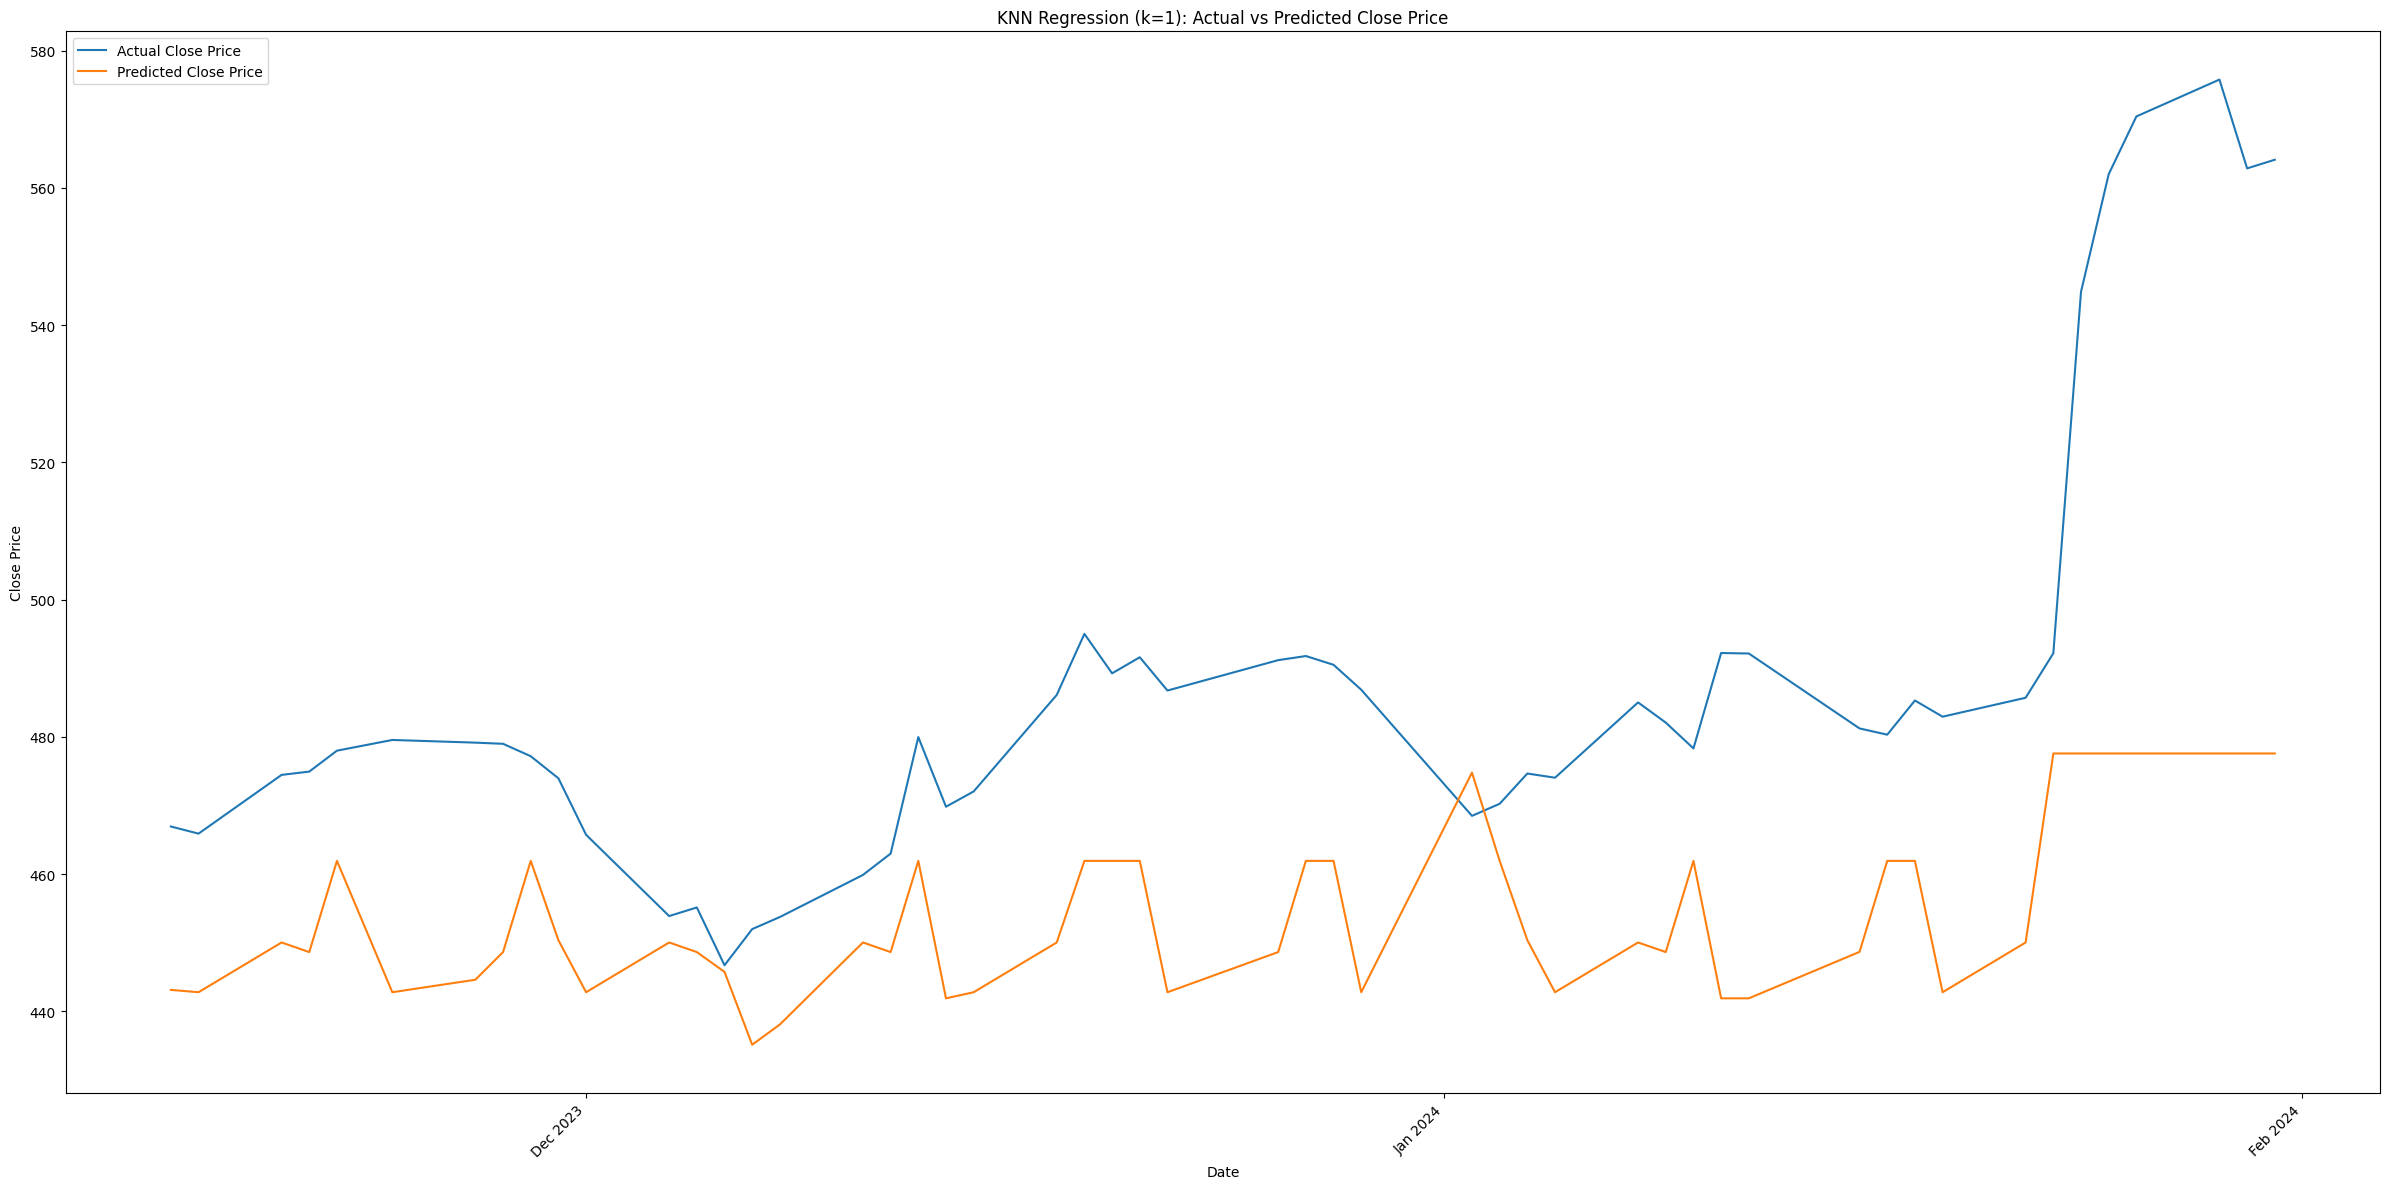

In [383]:
plt.figure(figsize=(24,12))
plt.plot(test_df['Date'], test_df_Y, label='Actual Close Price', color='C0')
plt.plot(test_df['Date'], knn_regression_predictions, label='Predicted Close Price', color='C1')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45, ha='right')
plt.title(f"KNN Regression (k={best_k_value}): Actual vs Predicted Close Price")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.tight_layout()
plt.show()

## f. Comparison of models and justification of the choice of a final model

### Linear Regression Model and KNN Regression Model Score Comparison

In [384]:
final_model = None
print("Linear Regression Model Scores: ")
print("\t Mean Squared Error (MSE):", linear_model_mse)
print("\t Root Mean Squared Error (RMSE):", linear_model_rmse)
print("\t R-squared (R2 ): ", linear_model_r2)
print("KNN Regression Model Scores: ")
print("\t Mean Squared Error (MSE):", knn_regression_mse)
print("\t Root Mean Squared Error (RMSE):", knn_regression_rmse)
print("\t R-squared (R2 ): ", knn_regression_r2)
print()
if(linear_model_r2 > knn_regression_r2 and linear_model_rmse < knn_regression_rmse and linear_model_mse < knn_regression_mse):
    print("Linear Regression model performs better than KNN Regression model.")
    final_model = linear_model
elif(knn_regression_r2 > linear_model_r2 and knn_regression_rmse < linear_model_rmse and knn_regression_mse < linear_model_mse):
    print("KNN Regression model performs better than Linear Regression model.")
    final_model = knn_regression_model
else:
    print("Neither model is strictly better; performance varies by metric.")

    

Linear Regression Model Scores: 
	 Mean Squared Error (MSE): 10.05331218923806
	 Root Mean Squared Error (RMSE): 3.1706958525279685
	 R-squared (R2 ):  0.9890801955657597
KNN Regression Model Scores: 
	 Mean Squared Error (MSE): 1583.2693448366063
	 Root Mean Squared Error (RMSE): 39.790317224628986
	 R-squared (R2 ):  -0.7197308993200568

Linear Regression model performs better than KNN Regression model.


### Graph comparision between two models prediction closing prices and actual closing prices

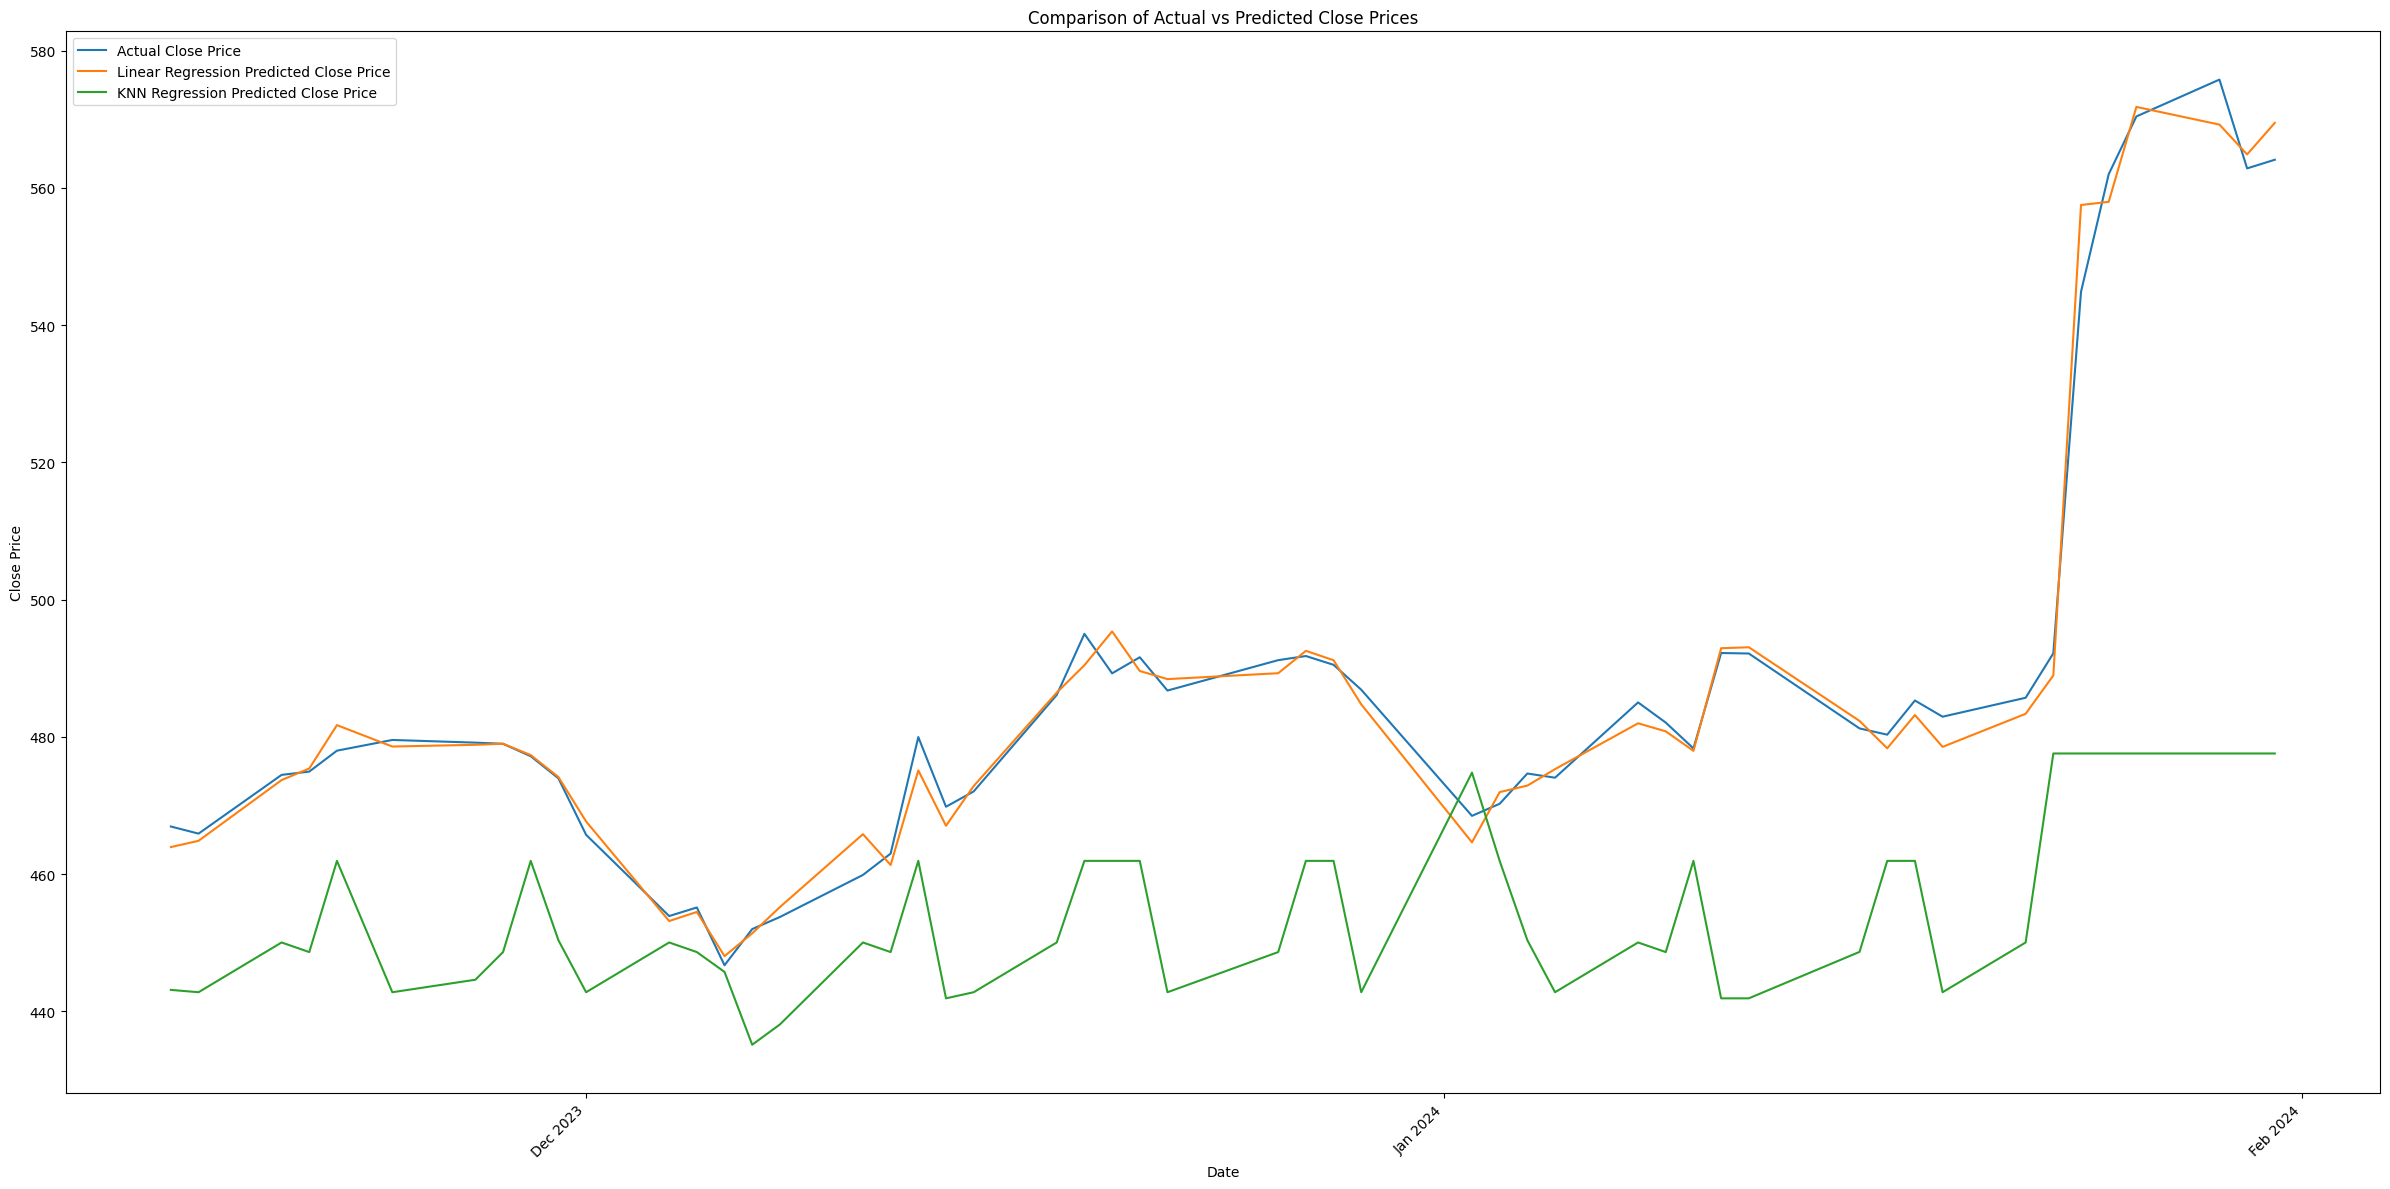

In [385]:
plt.figure(figsize=(24,12))
plt.plot(test_df['Date'], test_df_Y, label='Actual Close Price', color='C0')
plt.plot(test_df['Date'], linear_model_predictions, label='Linear Regression Predicted Close Price', color='C1')
plt.plot(test_df['Date'], knn_regression_predictions, label='KNN Regression Predicted Close Price', color='C2')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45, ha='right')
plt.title("Comparison of Actual vs Predicted Close Prices")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.tight_layout()
plt.show()

As we can see from the scores from three different metrices and from the graph as well, we can conclude that Linear Regression Model outperforms KNN Regression Model by a lot. Therefore we will be choosing Linear Regression Model as our final model.

## Estimating the daily closing price of Netflix shares

### Predictions using our Final Model (Linear Regression Model in this situation)

In [386]:
final_predictions = final_model.predict(test_df_scaled_X)
print("Final Model Predictions:")
print(final_predictions)

Final Model Predictions:
[463.94950858 464.86478869 473.71385493 475.40174715 481.72076781
 478.60221367 478.85428935 479.00784629 477.35681897 474.15586136
 467.68305164 453.17222805 454.49751379 448.05535661 451.38129368
 455.20609956 465.83336157 461.33811535 475.12451567 467.05555097
 472.84135493 486.45877213 490.44855502 495.37895025 489.60971026
 488.42765863 489.28613598 492.54624982 491.18015447 484.74815905
 464.6417436  471.96197774 472.90847397 475.30729449 481.98843275
 480.81481887 477.97466057 492.92905295 493.06728251 482.33399613
 478.34543949 483.19116152 478.55336451 483.37002097 488.96631326
 557.51609242 557.9755191  571.80868519 569.23096    564.88572342
 569.48541998]


### Saving our predictions to precos_estimados.csv

In [387]:
pd.DataFrame({'price': final_predictions}).to_csv('precos_estimados.csv', index=False)

# Additional Task

### Creating additional input variables

In [388]:
additional_df = df.copy()

additional_df['Daily_Return_Pct'] = additional_df['Previous_Close'].pct_change() * 100
additional_df.Daily_Return_Pct = additional_df.Daily_Return_Pct.fillna(additional_df.Daily_Return_Pct.mean())

additional_df['DailyReturnAbsolute'] = additional_df['Previous_Close'].diff()
additional_df.DailyReturnAbsolute = additional_df.DailyReturnAbsolute.fillna(additional_df.DailyReturnAbsolute.mean())

additional_df['MA5'] = additional_df['Previous_Close'].rolling(window=5).mean()
additional_df.MA5 = additional_df.MA5.fillna(additional_df.MA5.mean())

additional_df['MA10'] = additional_df['Previous_Close'].rolling(window=10).mean()
additional_df.MA10 = additional_df.MA10.fillna(additional_df.MA10.mean())

additional_df['HighMinusOpen'] = additional_df['High'] - additional_df['Open']
additional_df['LowMinusOpen'] = additional_df['Low'] - additional_df['Open']


print(additional_df.columns)
print(additional_df.head(5))


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Amplitude', 'Day_of_Week', 'Previous_Close', 'Daily_Return_Pct',
       'DailyReturnAbsolute', 'MA5', 'MA10', 'HighMinusOpen', 'LowMinusOpen'],
      dtype='object')
        Date        Open        High         Low       Close   Adj Close  \
0 2023-02-01  353.859985  365.390015  349.910004  361.989990  361.989990   
1 2023-02-02  365.160004  368.320007  358.429993  366.890015  366.890015   
2 2023-02-03  359.079987  379.429993  359.000000  365.899994  365.899994   
3 2023-02-06  363.640015  368.450012  360.679993  361.480011  361.480011   
4 2023-02-07  358.510010  364.179993  354.179993  362.950012  362.950012   

    Volume  Amplitude  Day_of_Week  Previous_Close  Daily_Return_Pct  \
0  8005200  15.480011            2      353.859985          0.213161   
1  7857000   9.890014            3      361.989990          2.297520   
2  9402000  20.429993            4      366.890015          1.353635   
3  4994900 

### Defining Input Variables and Target Variables

In [389]:
additional_input_variables = ["Open", "High", "Low", "Volume", "Amplitude", "Day_of_Week", "Previous_Close",
                              "Daily_Return_Pct", "DailyReturnAbsolute", "MA5", "MA10", "HighMinusOpen", "LowMinusOpen"]

additional_target_variable = "Close"

### Splitting the data into train and test data and Scaling them using MinMaxScaler

In [390]:
additional_train_df = additional_df.iloc[:split_index]
additional_test_df = additional_df.iloc[split_index:]

additional_train_df_scaled_X = scaler.fit_transform(additional_train_df[additional_input_variables])
additional_test_df_scaled_X = scaler.transform(additional_test_df[additional_input_variables])
additional_train_df_Y = additional_train_df[additional_target_variable]
additional_test_df_Y = additional_test_df[additional_target_variable]

### Implementing Linear Regression

Training Linear Regression Model

In [391]:
additional_linear_model = LinearRegression()
additional_linear_model.fit(additional_train_df_scaled_X, additional_train_df_Y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Testing Linear Regression Model and calculating it's score

In [392]:
additional_liner_model_predictions = additional_linear_model.predict(additional_test_df_scaled_X)
print("Additional Linear Model Predictions:")
print(additional_liner_model_predictions)
additional_liner_model_predictions_mse = mse(additional_test_df_Y, additional_liner_model_predictions)
additional_liner_model_predictions_rmse = rmse(additional_test_df_Y, additional_liner_model_predictions)
additional_liner_model_predictions_r2 = r2(additional_test_df_Y, additional_liner_model_predictions)
print(f"Additional Linear Regression Model Performance on Test Set:")
print(f"Mean Squared Error (MSE): {additional_liner_model_predictions_mse}")
print(f"Root Mean Squared Error (RMSE): {additional_liner_model_predictions_rmse}")
print(f"R-squared (R2 ): {additional_liner_model_predictions_r2}")

Additional Linear Model Predictions:
[464.76375609 465.26469093 473.42180729 475.94409264 481.73657549
 478.94247101 478.86592601 478.93537952 477.34648406 474.07793258
 467.56059122 452.48758765 453.6047825  448.16083596 450.82955393
 455.52996394 465.61440198 461.51636778 475.08662816 468.19757394
 472.07588379 486.45663144 491.4104239  496.05027623 489.08561382
 488.73396746 488.8413814  492.94310842 491.24611584 484.71646686
 464.27504102 470.41050123 473.0929472  475.68059418 481.64354292
 481.38513036 477.55324374 492.56004612 494.21993679 482.20530297
 477.39880033 483.18654321 479.12296742 483.02837115 489.14908225
 557.96503758 562.32187672 573.41309833 569.84907526 565.47643356
 568.08916679]
Additional Linear Regression Model Performance on Test Set:
Mean Squared Error (MSE): 9.855516898977273
Root Mean Squared Error (RMSE): 3.1393497573506
R-squared (R2 ): 0.9892950387783253


### Graph comparing Linear Regression model predictions to Actual Prices

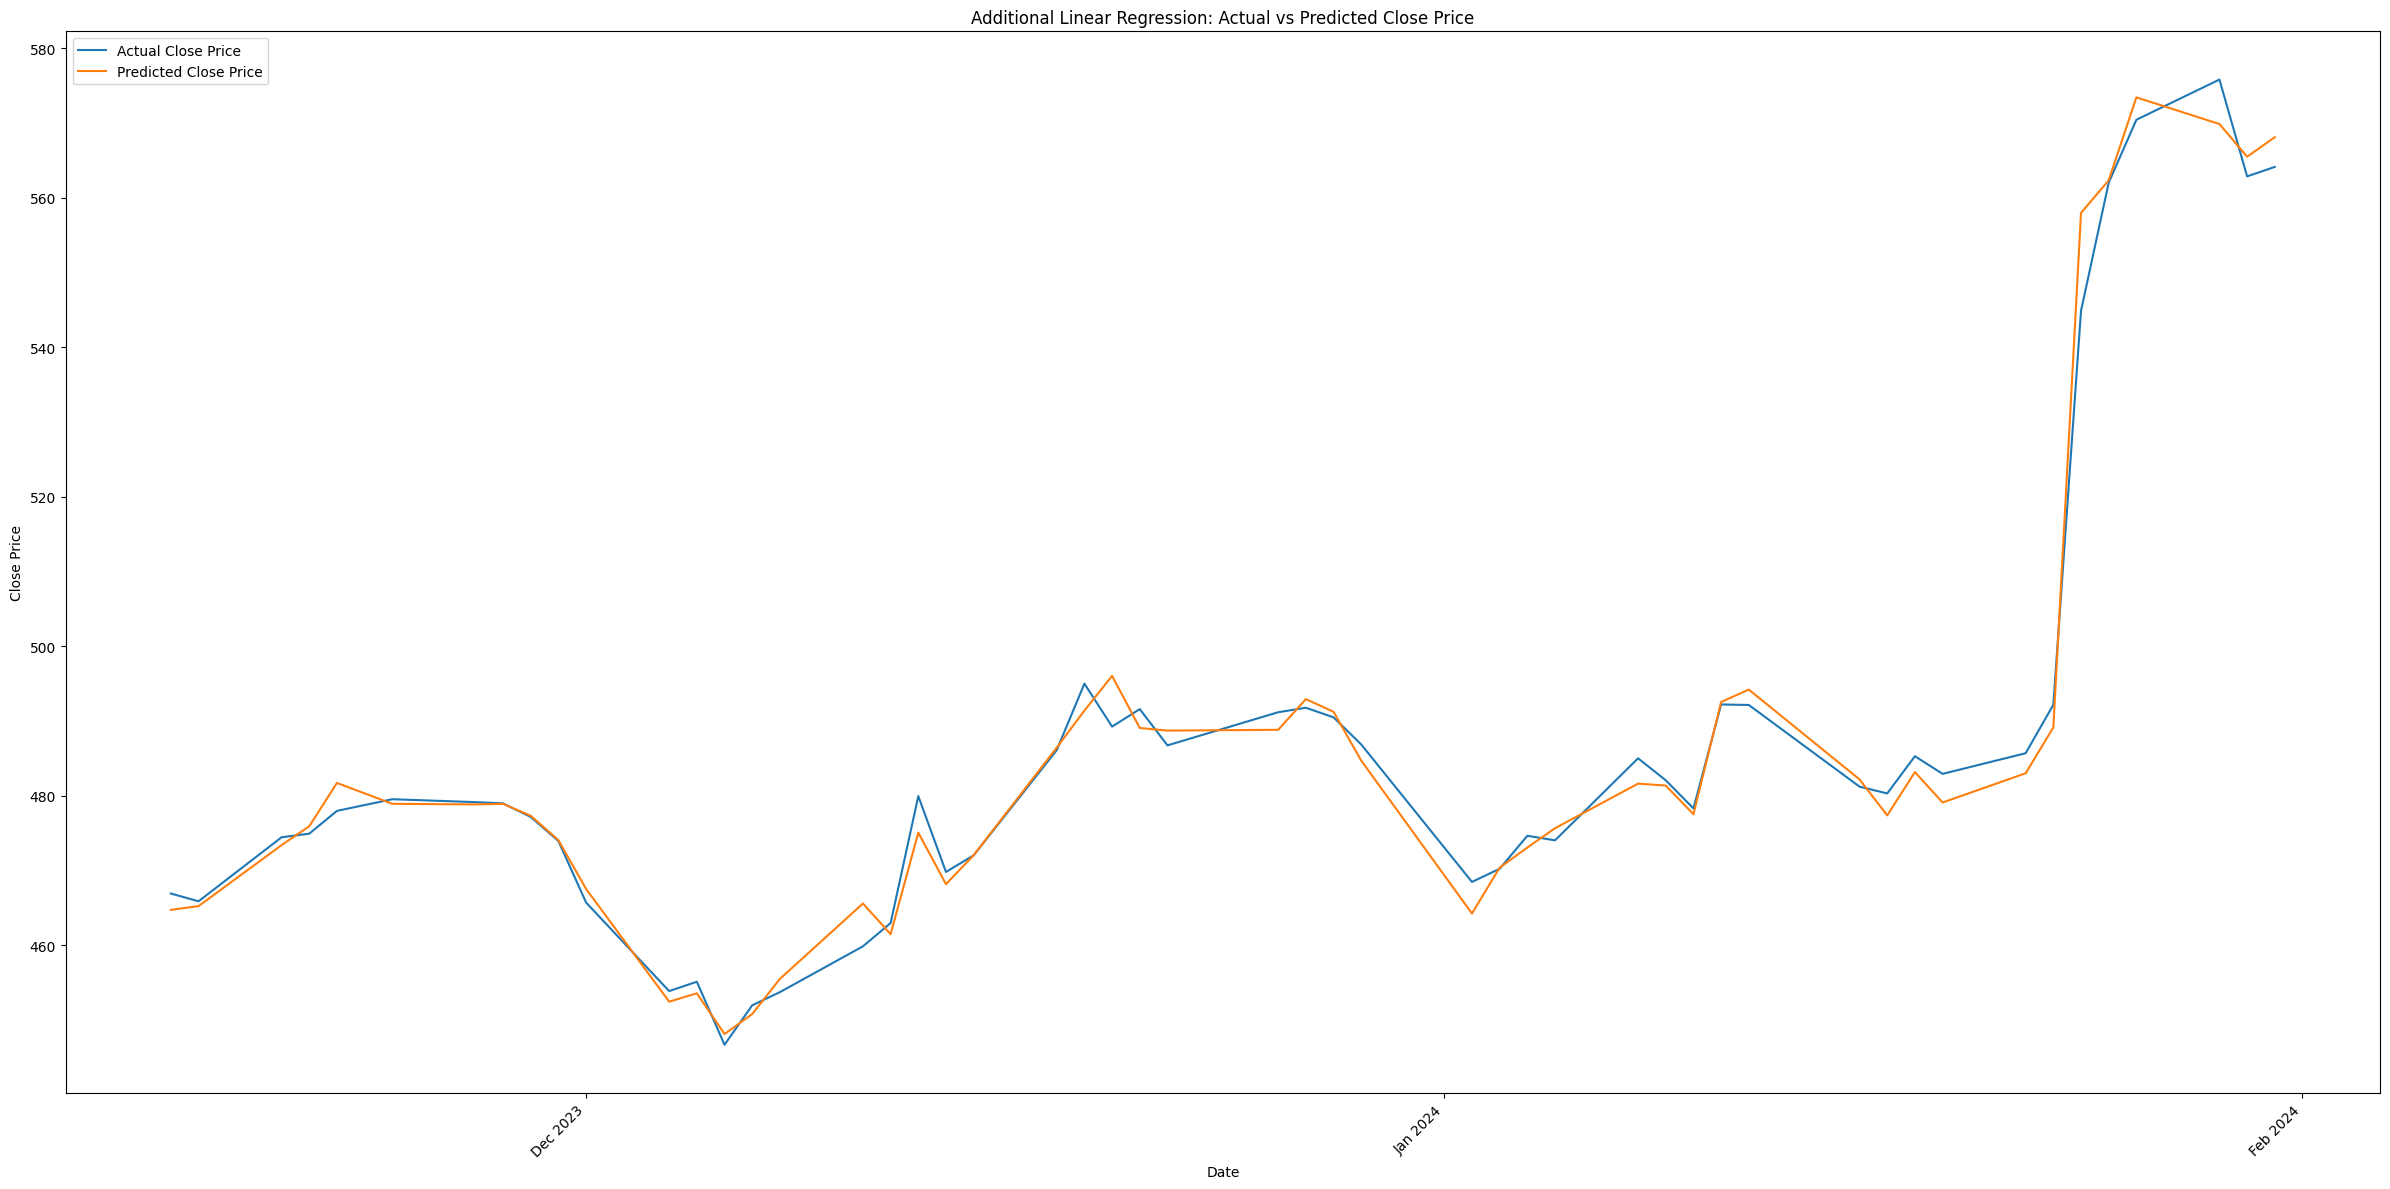

In [393]:
plt.figure(figsize=(24,12))
plt.plot(additional_test_df['Date'], additional_test_df_Y, label='Actual Close Price', color='C0')
plt.plot(additional_test_df['Date'], additional_liner_model_predictions, label='Predicted Close Price', color='C1')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45, ha='right')
plt.title("Additional Linear Regression: Actual vs Predicted Close Price")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.tight_layout()
plt.show()

### Comparision between Linear Model without Additional Variables and Linear Model with Additional Variables

In [394]:
print("Original Linear Regression Model Scores: ")
print("\t Mean Squared Error (MSE):", linear_model_mse)
print("\t Root Mean Squared Error (RMSE):", linear_model_rmse)
print("\t R-squared (R2 ): ", linear_model_r2)
print("Additional Linear Regression Model with Derived Variables Scores: ")
print("\t Mean Squared Error (MSE):", additional_liner_model_predictions_mse)
print("\t Root Mean Squared Error (RMSE):", additional_liner_model_predictions_rmse)
print("\t R-squared (R2 ): ", additional_liner_model_predictions_r2)
print()
if(additional_liner_model_predictions_r2 > linear_model_r2 and
   additional_liner_model_predictions_rmse < linear_model_rmse and
   additional_liner_model_predictions_mse < linear_model_mse):
    print("Additional Linear Regression model with derived variables performs better than the original Linear Regression model.")
elif(additional_liner_model_predictions_r2 < linear_model_r2 and
     additional_liner_model_predictions_rmse > linear_model_rmse and
     additional_liner_model_predictions_mse > linear_model_mse):
    print("Original Linear Regression model performs better than the Additional Linear Regression model with derived variables.")
else:
    print("Neither model is strictly better; performance varies by metric.")

Original Linear Regression Model Scores: 
	 Mean Squared Error (MSE): 10.05331218923806
	 Root Mean Squared Error (RMSE): 3.1706958525279685
	 R-squared (R2 ):  0.9890801955657597
Additional Linear Regression Model with Derived Variables Scores: 
	 Mean Squared Error (MSE): 9.855516898977273
	 Root Mean Squared Error (RMSE): 3.1393497573506
	 R-squared (R2 ):  0.9892950387783253

Additional Linear Regression model with derived variables performs better than the original Linear Regression model.


Graph Comparing Linear Model without Additional Variables and Linear Model with Additional Variables

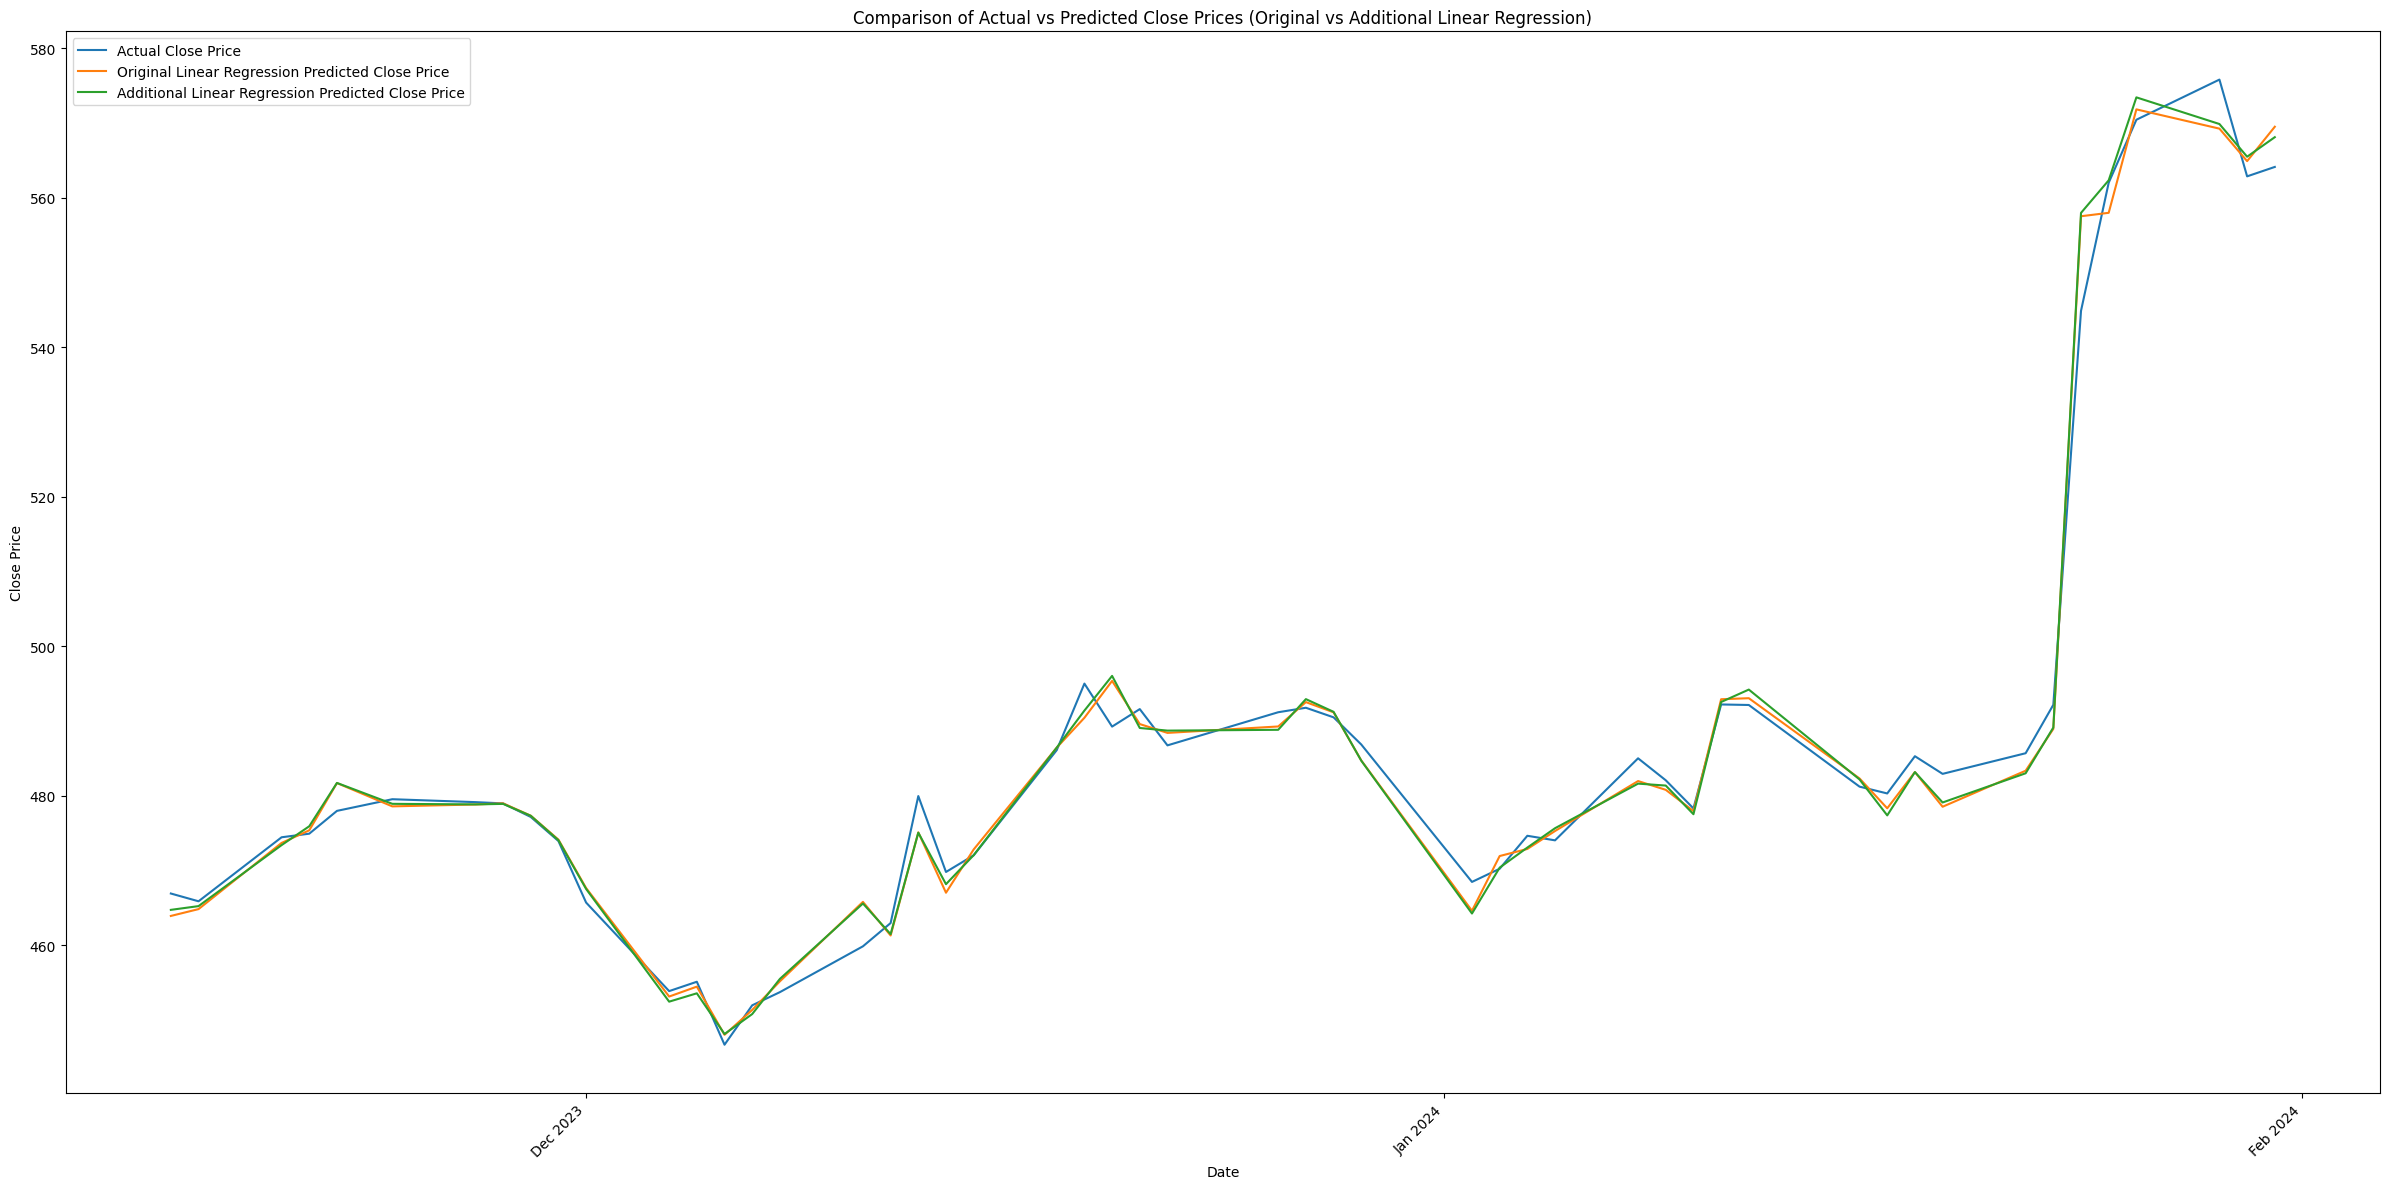

In [395]:
plt.figure(figsize=(24,12))
plt.plot(additional_test_df['Date'], additional_test_df_Y, label='Actual Close Price', color='C0')
plt.plot(additional_test_df['Date'], linear_model_predictions, label='Original Linear Regression Predicted Close Price', color='C1')
plt.plot(additional_test_df['Date'], additional_liner_model_predictions, label='Additional Linear Regression Predicted Close Price', color='C2')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45, ha='right')
plt.title("Comparison of Actual vs Predicted Close Prices (Original vs Additional Linear Regression)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.tight_layout()
plt.show()

From the output and graph given above, we can see that the Linear Regression Model with additional input variable performs slightly better than the Orignal Linear Regression Model.

### Implementing KNN Regression Model

Finding best value for K:

In [396]:
additional_knn_mse_results = {}
additional_knn_rmse_results = {}
additional_knn_r2_results = {}
for k in range(1,51):
  additional_knn_model = KNeighborsRegressor(n_neighbors=k)
  additional_knn_model.fit(additional_train_df_scaled_X, additional_train_df_Y)
  additional_knn_predictions = additional_knn_model.predict(additional_test_df_scaled_X)
  additional_knn_mse = mse(additional_test_df_Y, additional_knn_predictions)
  additional_knn_rmse = rmse(additional_test_df_Y, additional_knn_predictions)
  additional_knn_r2 = r2(additional_test_df_Y, additional_knn_predictions)
  additional_knn_mse_results[k] = additional_knn_mse
  additional_knn_rmse_results[k] = additional_knn_rmse
  additional_knn_r2_results[k] = additional_knn_r2
  print(f"Additional KNN (k={k}) - MSE: {additional_knn_mse}, RMSE: {additional_knn_rmse}, R2: {additional_knn_r2}")
best_additional_k_r2 = max(additional_knn_r2_results, key=additional_knn_r2_results.get)
best_additional_k_mse = min(additional_knn_mse_results, key=additional_knn_mse_results.get)
best_additional_k_rmse = min(additional_knn_rmse_results, key=additional_knn_rmse_results.get)
print(f"Best k for Additional KNN MSE: {best_additional_k_mse} with MSE: {additional_knn_mse_results[best_additional_k_mse]}")
print(f"Best k for Additional KNN RMSE: {best_additional_k_rmse} with RMSE: {additional_knn_rmse_results[best_additional_k_rmse]}")
print(f"Best k for Additional KNN R2: {best_additional_k_r2} with R2: {additional_knn_r2_results[best_additional_k_r2]}")

Additional KNN (k=1) - MSE: 1882.5213099213256, RMSE: 43.388031874254516, R2: -1.0447753099358317
Additional KNN (k=2) - MSE: 2022.5088277490665, RMSE: 44.972311790134455, R2: -1.196828313875176
Additional KNN (k=3) - MSE: 2185.86169955407, RMSE: 46.7531998857198, R2: -1.3742605253001523
Additional KNN (k=4) - MSE: 2267.0497872401866, RMSE: 47.613546257763524, R2: -1.4624461921962233
Additional KNN (k=5) - MSE: 2314.8448706253475, RMSE: 48.11283478060036, R2: -1.5143607208271819
Additional KNN (k=6) - MSE: 2423.776937928254, RMSE: 49.231869128931656, R2: -1.6326816134021298
Additional KNN (k=7) - MSE: 2507.9082857068265, RMSE: 50.0790204148087, R2: -1.7240642191780187
Additional KNN (k=8) - MSE: 2592.8542811558723, RMSE: 50.92007738756759, R2: -1.8163316868856696
Additional KNN (k=9) - MSE: 2650.419228129153, RMSE: 51.48222244745416, R2: -1.878858140991864
Additional KNN (k=10) - MSE: 2696.4136500275586, RMSE: 51.92700309114284, R2: -1.9288168096119618
Additional KNN (k=11) - MSE: 2722

From the result above, we can see that the best value for K is 1. So we will use K=1 for our model

Training KNN model with best K value:

In [397]:
additional_best_k_value = best_additional_k_r2
additional_knn_model = KNeighborsRegressor(n_neighbors=additional_best_k_value)
additional_knn_model.fit(additional_train_df_scaled_X, additional_train_df_Y)

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


## Calculating new KNN model scores and comparing to orignal KNN model

In [398]:
additional_knn_model_predictions = additional_knn_model.predict(additional_test_df_scaled_X)
additional_knn_model_predictions_mse = mse(additional_test_df_Y, additional_knn_model_predictions)
additional_knn_model_predictions_rmse = rmse(additional_test_df_Y, additional_knn_model_predictions)
additional_knn_model_predictions_r2 = r2(additional_test_df_Y, additional_knn_model_predictions)

print(f"Additional KNN Regression Model Performance on Test Set (k={additional_best_k_value}):")
print(f"\tMean Squared Error (MSE): {additional_knn_model_predictions_mse}")
print(f"\tRoot Mean Squared Error (RMSE): {additional_knn_model_predictions_rmse}")
print(f"\tR-squared (R2 ): {additional_knn_model_predictions_r2}")
print()

print("Original KNN Regression Model Scores: ")
print("\t Mean Squared Error (MSE):", knn_regression_mse)
print("\t Root Mean Squared Error (RMSE):", knn_regression_rmse)
print("\t R-squared (R2 ): ", knn_regression_r2)
print()

if(additional_knn_model_predictions_r2 > knn_regression_r2 and
   additional_knn_model_predictions_rmse < knn_regression_rmse and
   additional_knn_model_predictions_mse < knn_regression_mse):
    print("Additional KNN Regression model with derived variables performs better than the original KNN Regression model.")
elif(additional_knn_model_predictions_r2 < knn_regression_r2 and
     additional_knn_model_predictions_rmse > knn_regression_rmse and
     additional_knn_model_predictions_mse > knn_regression_mse):
    print("Original KNN Regression model performs better than the Additional KNN Regression model with derived variables.")
else:
    print("Neither model is strictly better; performance varies by metric.")

Additional KNN Regression Model Performance on Test Set (k=1):
	Mean Squared Error (MSE): 1882.5213099213256
	Root Mean Squared Error (RMSE): 43.388031874254516
	R-squared (R2 ): -1.0447753099358317

Original KNN Regression Model Scores: 
	 Mean Squared Error (MSE): 1583.2693448366063
	 Root Mean Squared Error (RMSE): 39.790317224628986
	 R-squared (R2 ):  -0.7197308993200568

Original KNN Regression model performs better than the Additional KNN Regression model with derived variables.


Graph comparing Orignal KNN model predictions, New KNN model predictions and Actual Closing Price

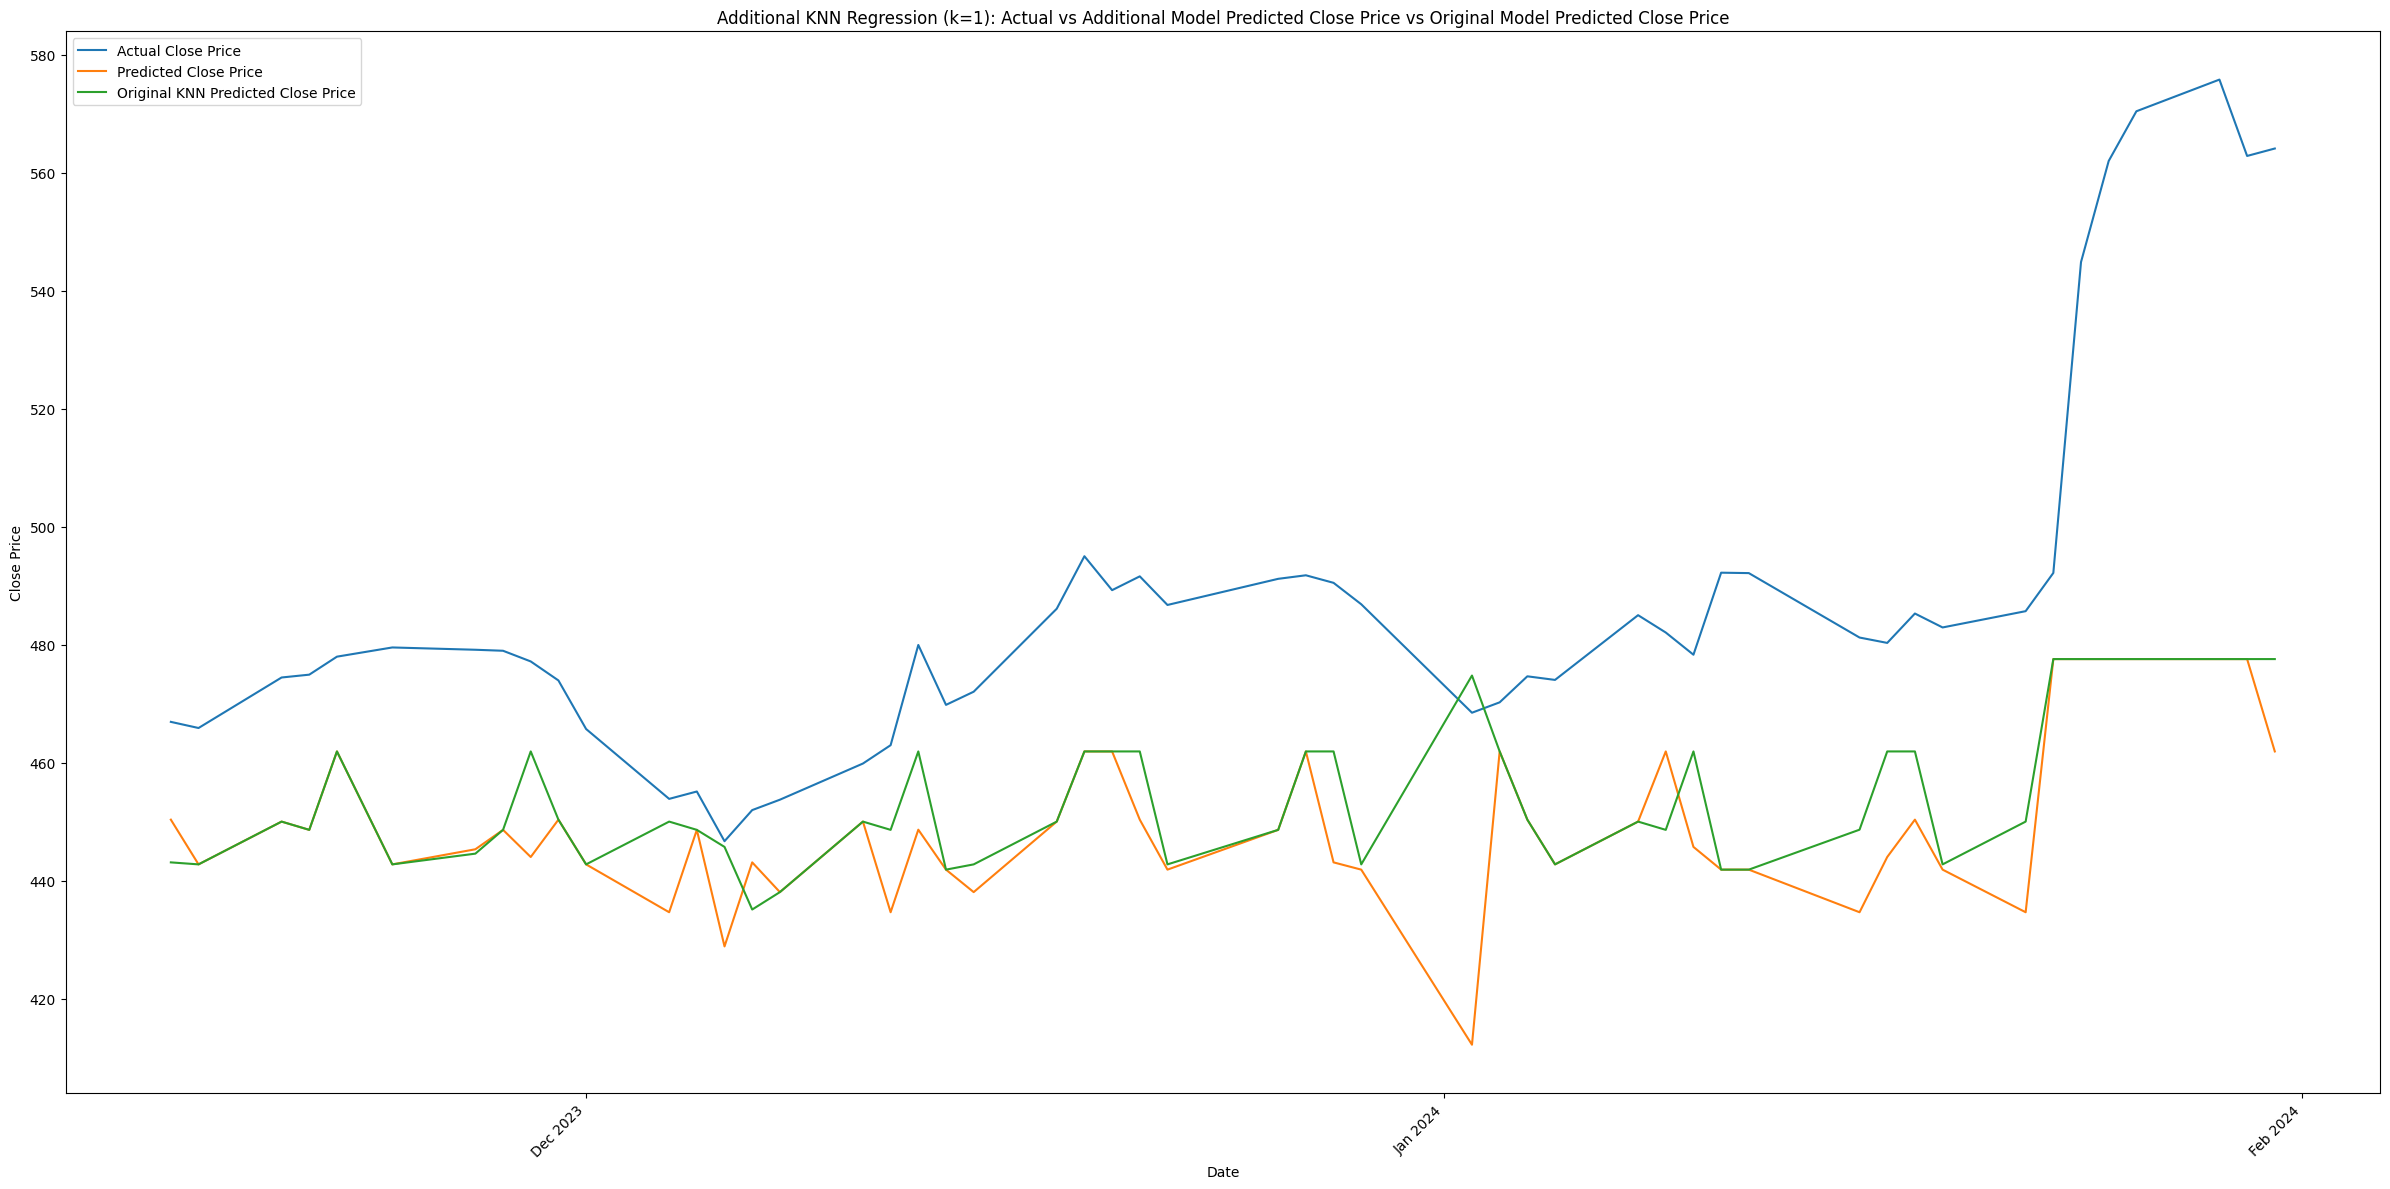

In [399]:
plt.figure(figsize=(24,12))
plt.plot(additional_test_df['Date'], additional_test_df_Y, label='Actual Close Price', color='C0')
plt.plot(additional_test_df['Date'], additional_knn_model_predictions, label='Predicted Close Price', color='C1')
plt.plot(additional_test_df['Date'], knn_regression_predictions, label='Original KNN Predicted Close Price', color='C2')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45, ha='right')
plt.title(f"Additional KNN Regression (k={additional_best_k_value}): Actual vs Additional Model Predicted Close Price vs Original Model Predicted Close Price")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.tight_layout()
plt.show()

From the output and graph given above, we can see that the KNN Regression Model with additional input variable performs worse than the Orignal Linear Regression Model.

# Conclusion

Here are few conclusions we deducted from the tasks done in this project:
  * Linear Regression Model performed better than KNN Regression Model for this dataset.
  * Adding extra input variables to model increased the performance of Linear Regression Model, but decreased the performance of KNN Regression Model